# Lab 2 | Image And Video Processing
## Abhinav Robinson | E18CSE006

In [ ]:
# RGB to Gray-scale conversion of images

# Using Direct Conversion Via Pillow Image Lib.
from PIL import Image
img = Image.open('image.png').convert('LA')
img.save('greyscale.png')

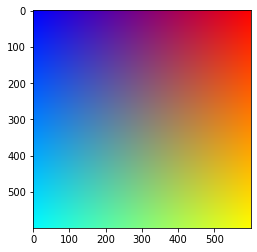

In [ ]:
# Printing Original Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('image.png')
imgplot = plt.imshow(img)
plt.show()

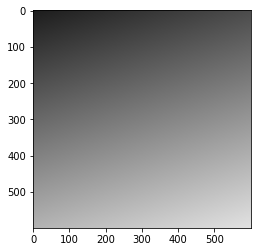

In [ ]:
# Printing Grayscale Image
img=mpimg.imread('greyscale.png')
imgplot = plt.imshow(img)
plt.show()

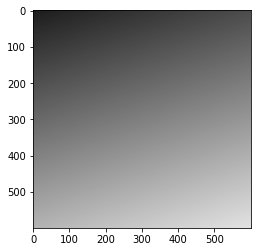

In [ ]:
# Now Let's Do the same w/o using any specialized libraries!
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('image.png')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

The above obtained image is a grayscale image which is converted by replacing/scaling the RGB values to purely luminosity values, resulting in colors being translated into just a shade of gray! (Luminosity-Alpha Preservation)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


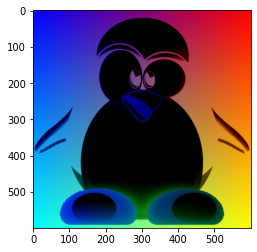

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


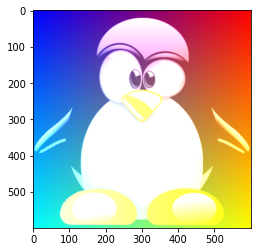

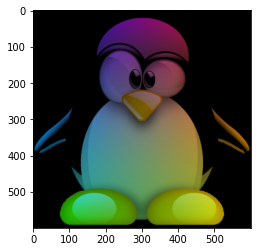

In [ ]:
# Now we will Layer 2 images and do some operations on them!
imglayer = mpimg.imread('layering.png')[:600,:600,:3]
sub,add,mup = img-imglayer, img+imglayer, img*imglayer
imgplot = plt.imshow(sub)
plt.show()
imgplot = plt.imshow(add)
plt.show()
imgplot = plt.imshow(mup)
plt.show()

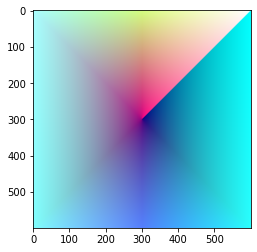

Original RGB
[[[0.         0.         1.        ]
  [0.00166323 0.         0.99832153]
  [0.00332647 0.         0.99665827]
  ...
  [0.99499506 0.         0.0049897 ]
  [0.99665827 0.         0.00332647]
  [0.99832153 0.         0.00166323]]]
Converted HSV
[[[0.6666667  1.         1.        ]
  [0.6669443  1.         0.99832153]
  [0.6672229  1.         0.99665827]
  ...
  [0.9991642  1.         0.99499506]
  [0.9994437  1.         0.99665827]
  [0.9997223  1.         0.99832153]]]


In [ ]:
# Now we will convert from RGB to HSV Colorspace!
from matplotlib import colors
img_hsv = colors.rgb_to_hsv(img)
imgplot = plt.imshow(img_hsv)
plt.show()
print("Original RGB")
print(img[:1])
print("Converted HSV")
print(img_hsv[:1])

Width : 600 
Height:  613
Cropped Width : 600 
Cropped Height:  613
Bilinear


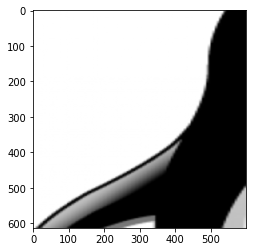

BiCubic


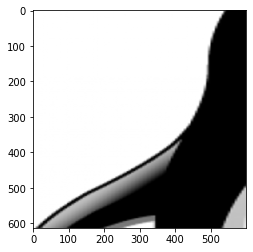

Nearest Neighbour


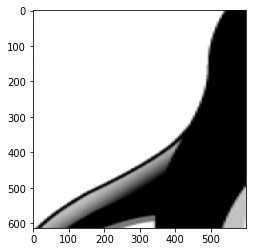

In [ ]:
# Now we will perform Image Scaling!
import PIL 
org_scale = PIL.Image.open('layering.png')
width, height = org_scale.size  
print("Width :",width,"\nHeight: ",height)
cropped = org_scale.crop((4, height/5, 154, 3 * height / 5)) 
cwidth, cheight = org_scale.size  
print("Cropped Width :",cwidth,"\nCropped Height: ",cheight)
newsize = (600,613) #2x factor
scaled_bilinear = cropped.resize(newsize,resample=PIL.Image.BILINEAR)
scaled_bicubic = cropped.resize(newsize,resample=PIL.Image.BICUBIC)
scaled_NN = cropped.resize(newsize,resample=PIL.Image.NEAREST)
print("Bilinear")
imgplot = plt.imshow(scaled_bilinear)
plt.show()
print("BiCubic")
imgplot = plt.imshow(scaled_bicubic)
plt.show()
print("Nearest Neighbour")
imgplot = plt.imshow(scaled_NN)
plt.show()

We can see that the Image sharpness increases in the order of Bilinear -> Bicubic -> Neareast Neighbour

This has arrised according to the pixel processing method of each type, as one is a simple averaging (Bilinear) and Nearest Neighbour (group pixel average).